### CSCI 477/577: Homework 1
Due 02/23/2023

In [1]:
import ode_methods
import numpy as np
import matplotlib.pyplot as plt

#### Problem 1: Comparing the motion of two objects (Gould 3.11)

Consider the motion of two identical objects that both start from a height h. One object is dropped
vertically from rest and the other is thrown with a horizontal velocity v0,x. Which object reaches the ground
first?

answer: Both objects reach the ground at the same time. The horizontal velocity of the second object does not affect the time it takes to fall to the ground.

1. Give reasons for your answer assuming that air resistance can be neglected.

answer: The time it takes for an object to fall to the ground is determined by the vertical component of its velocity. The horizontal component of the second object's velocity does not affect the time it takes to fall to the ground.

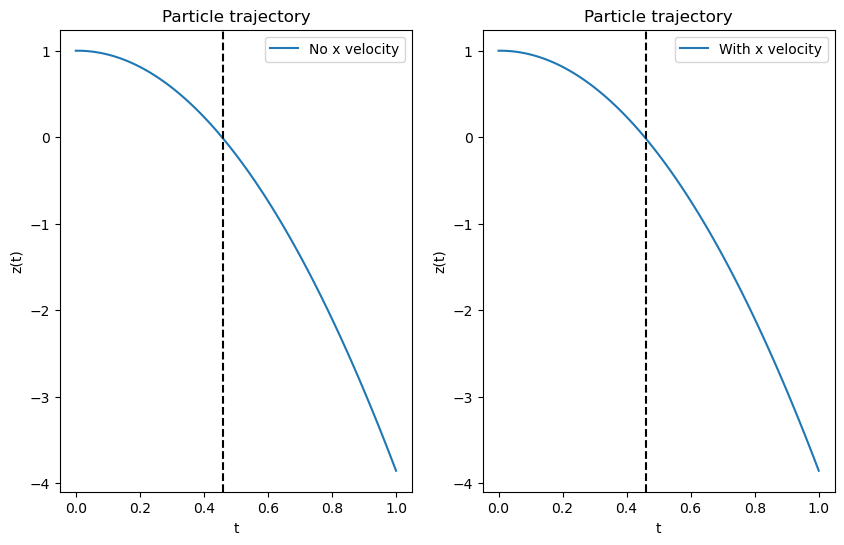

In [9]:
# use ode_methods to drop a ball from 1m with no initial velocity
# and plot the results
pm = ode_methods.ParticleMotion2DWithDrag(c=0)
method = ode_methods.Euler()
integrator = ode_methods.Integrator(pm, method)

# Initial conditions
t_0 = 0.0
t_end = 1.0
dt = 0.01
x_0 = 0.0
vx_0 = 0.0
z_0 = 1.0
vz_0 = 0.0
u_0 = np.array([x_0, vx_0, z_0, vz_0])

# Perform the integration
t_noX, u_noX = integrator.integrate([t_0, t_end], dt, u_0)

# now with some x velocity
# Initial conditions
t_0 = 0.0
t_end = 1.0
dt = 0.01
x_0 = 0.0
vx_0 = 5.0
z_0 = 1.0
vz_0 = 0.0
u_0 = np.array([x_0, vx_0, z_0, vz_0])

# Perform the integration
t_withX, u_withX = integrator.integrate([t_0, t_end], dt, u_0)

# plot z as a function of t for both cases, showing at what time the ball hits the ground
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(t_noX, u_noX[:, 2], label='No x velocity')
ax[0].set_xlabel('t')
ax[0].set_ylabel('z(t)')
ax[0].set_title('Particle trajectory')
ax[0].legend()
ax[1].plot(t_withX, u_withX[:, 2], label='With x velocity')
ax[1].set_xlabel('t')
ax[1].set_ylabel('z(t)')
ax[1].set_title('Particle trajectory')
ax[1].legend()
# show the time at which the ball hits the ground (z=0)
ax[0].axvline(t_noX[np.where(u_noX[:, 2] < 0)[0][0]], color='k', linestyle='--')
ax[1].axvline(t_withX[np.where(u_withX[:, 2] < 0)[0][0]], color='k', linestyle='--')
plt.show()

As expected, without drag, both balls hit the ground at the same time.

2. Assume that air resistance cannot be neglected and that the drag force is proportional to |v|^2. Give reasons for your anticipated answer for this case. Then perform numerical simulations using, for example, c_d/m = 0.1, h = 10m, and v_0,x = 30 m/s. Are your qualitative results consistent with your anticipated answer?

answer: The drag force on the second object will slow it down, so it will take longer to reach the ground. The horizontal velocity of the second object does not affect the time it takes to fall to the ground.

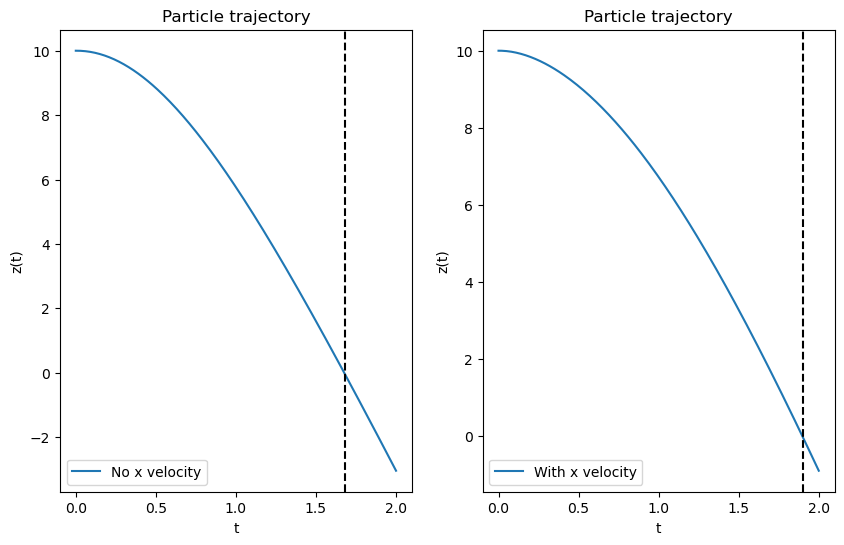

In [3]:
# use ode_methods to drop a ball from 1m with no initial velocity
# and plot the results
pm = ode_methods.ParticleMotion2DWithDrag(c=0.1)
method = ode_methods.Euler()
integrator = ode_methods.Integrator(pm, method)

# Initial conditions, no x velocity
t_0 = 0.0
t_end = 2.0
dt = 0.01
x_0 = 0.0
vx_0 = 0.0
z_0 = 10.0
vz_0 = 0.0
u_0 = np.array([x_0, vx_0, z_0, vz_0])

# Perform the integration
t_noX, u_noX = integrator.integrate([t_0, t_end], dt, u_0)

# now with some x velocity
# Initial conditions
t_0 = 0.0
t_end = 2.0
dt = 0.01
x_0 = 0.0
vx_0 = 30.0
z_0 = 10.0
vz_0 = 0.0
u_0 = np.array([x_0, vx_0, z_0, vz_0])

# Perform the integration
t_withX, u_withX = integrator.integrate([t_0, t_end], dt, u_0)

# plot z as a function of t for both cases, showing at what time the ball hits the ground
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(t_noX, u_noX[:, 2], label='No x velocity')
ax[0].set_xlabel('t')
ax[0].set_ylabel('z(t)')
ax[0].set_title('Particle trajectory')
ax[0].legend()
ax[1].plot(t_withX, u_withX[:, 2], label='With x velocity')
ax[1].set_xlabel('t')
ax[1].set_ylabel('z(t)')
ax[1].set_title('Particle trajectory')
ax[1].legend()
# show the time at which the ball hits the ground (z=0)
ax[0].axvline(t_noX[np.where(u_noX[:, 2] < 0)[0][0]], color='k', linestyle='--')
ax[1].axvline(t_withX[np.where(u_withX[:, 2] < 0)[0][0]], color='k', linestyle='--')
plt.show()

Now with drag, the second ball takes longer to hit the ground, as expected.

3. Suppose that the drag force is proportional to |v| rather than to |v|^2. Is your anticipated answer similar to that in part (b)? Do a numerical simulation to test your intuition.

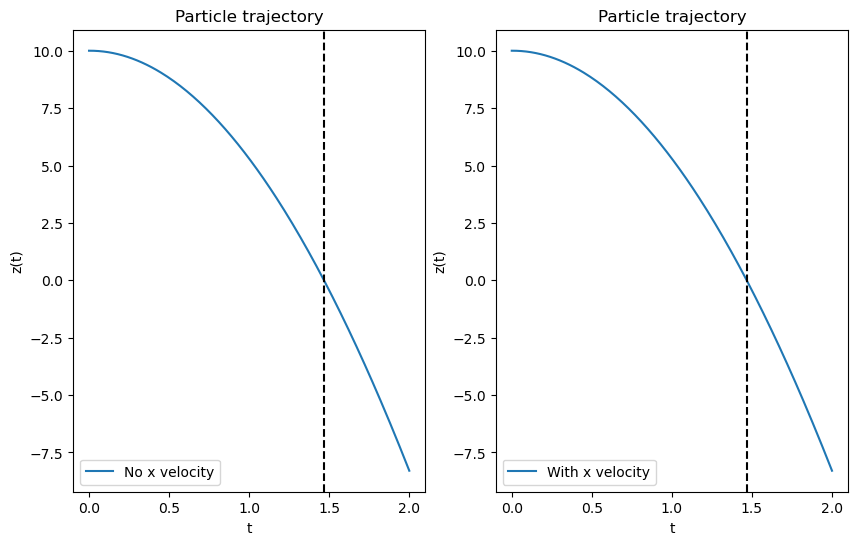

In [10]:
# drag now proportional to |v|
pm = ode_methods.ParticleMotion2DWithDrag(c=0.1, drag_type='linear')
method = ode_methods.Euler()
integrator = ode_methods.Integrator(pm, method)

# Initial conditions, no x velocity
t_0 = 0.0
t_end = 2.0
dt = 0.01
x_0 = 0.0
vx_0 = 0.0
z_0 = 10.0
vz_0 = 0.0
u_0 = np.array([x_0, vx_0, z_0, vz_0])

# Perform the integration
t_noX, u_noX = integrator.integrate([t_0, t_end], dt, u_0)

# now with some x velocity
# Initial conditions
t_0 = 0.0
t_end = 2.0
dt = 0.01
x_0 = 0.0
vx_0 = 30.0
z_0 = 10.0
vz_0 = 0.0
u_0 = np.array([x_0, vx_0, z_0, vz_0])

# Perform the integration
t_withX, u_withX = integrator.integrate([t_0, t_end], dt, u_0)

# plot z as a function of t for both cases, showing at what time the ball hits the ground
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
ax[0].plot(t_noX, u_noX[:, 2], label='No x velocity')
ax[0].set_xlabel('t')
ax[0].set_ylabel('z(t)')
ax[0].set_title('Particle trajectory')
ax[0].legend()
ax[1].plot(t_withX, u_withX[:, 2], label='With x velocity')
ax[1].set_xlabel('t')
ax[1].set_ylabel('z(t)')
ax[1].set_title('Particle trajectory')
ax[1].legend()
# show the time at which the ball hits the ground (z=0)
ax[0].axvline(t_noX[np.where(u_noX[:, 2] < 0)[0][0]], color='k', linestyle='--')
ax[1].axvline(t_withX[np.where(u_withX[:, 2] < 0)[0][0]], color='k', linestyle='--')
plt.show()

In [11]:
# time both balls hit ground
print('No x velocity:', t_noX[np.where(u_noX[:, 2] < 0)[0][0]])
print('With x velocity:', t_withX[np.where(u_withX[:, 2] < 0)[0][0]])

No x velocity: 1.470000000000001
With x velocity: 1.470000000000001


Drag proportional to |v| appears to have a much smaller effect on the time it takes for the second ball to hit the ground. It appears that they balls actually hit the ground at the same time.

#### Problem 2: Conservation of energy

Consider the problem of a simple harmonic oscillator, which obeys the equation
<!-- latex dv/dt = -x -->
$$
\begin{equation}
\frac{dv}{dt} = -x
\end{equation}
$$
$$
\begin{equation}
\frac{dx}{dt} = v
\end{equation}
$$
with initial conditions $x_{0}$ = 1 and $v_{0}$ = 0. The total energy of this system is given by
<!-- latex E = 1/2v^2 + 1/2x^2 -->
$$
\begin{equation}
E = \frac{1}{2}v^2 + \frac{1}{2}x^2
\end{equation}
$$
with a true value of $E = \frac{1}{2}$.

Show using a numerical simulation of the above equations that after a single time step, the energy for both the Euler and Euler-Cromer scheme changes proportionally to  For example, you could make a log-log plot of the energy error |E1 −12| for both schemes and evaluate the slope of the resulting line.

1. Show that the energy error for the Euler-Cromer scheme is proportional to $\Delta t^2$ by making a log-log plot of the energy error $|E_{1} −\frac{1}{2}|$ versus $\Delta t$ and evaluating the slope of the resulting line.

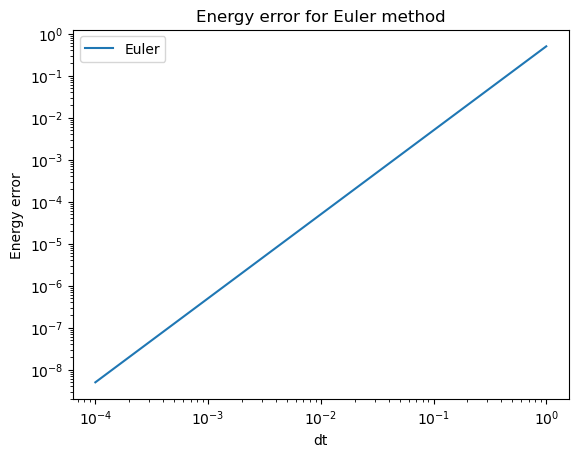

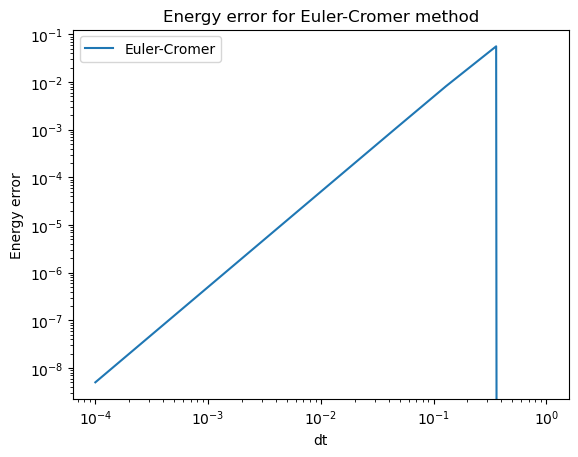

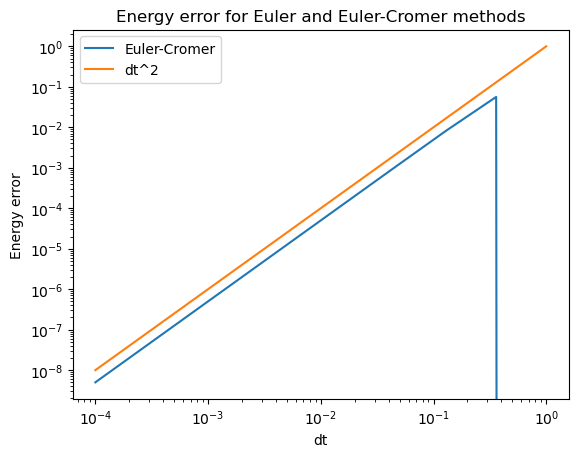

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the initial conditions and parameters
x0, v0 = 1, 0
E_true = 0.5
dt_values = np.logspace(-4, 0, 10)  # range of time step sizes

# Define the equations of motion
def dvdt(x):
    return -x

def dxdt(v):
    return v

# Implement the Euler and Euler-Cromer methods
def euler(x, v, dt):
    v_new = v + dvdt(x) * dt
    x_new = x + dxdt(v) * dt
    return x_new, v_new

def euler_cromer(x, v, dt):
    v_new = v + dvdt(x) * dt
    x_new = x + dxdt(v_new) * dt
    return x_new, v_new

# calculate energy for euler
def energy_euler(x, v):
    return 0.5 * v**2 + 0.5 * x**2

# calculate energy for euler-cromer
def energy_euler_cromer(x, v):
    return 0.5 * v**2 + 0.5 * x**2

energy_error_euler = []
energy_error_euler_cromer = []
for dt in dt_values:
    x, v = x0, v0
    x_new, v_new = euler(x, v, dt)
    energy_error_euler.append(np.abs(energy_euler(x_new, v_new) - E_true))
    x, v = x0, v0
    x_new, v_new = euler_cromer(x, v, dt)
    energy_error_euler_cromer.append(np.abs(energy_euler_cromer(x_new, v_new) - E_true))

# plot energy error for euler 
plt.figure()
plt.loglog(dt_values, energy_error_euler, label='Euler')
plt.xlabel('dt')
plt.ylabel('Energy error')
plt.title('Energy error for Euler method')
plt.legend()
plt.show()

# plot energy error for euler-cromer
plt.figure()
plt.loglog(dt_values, energy_error_euler_cromer, label='Euler-Cromer')
plt.xlabel('dt')
plt.ylabel('Energy error')
plt.title('Energy error for Euler-Cromer method')
plt.legend()
plt.show()

# show that the energy error for the Euler-Cromer method is proportional to dt^2
plt.figure()
plt.loglog(dt_values, energy_error_euler_cromer, label='Euler-Cromer')
plt.loglog(dt_values, dt_values**2, label='dt^2')
plt.xlabel('dt')
plt.ylabel('Energy error')
plt.title('Energy error for Euler and Euler-Cromer methods')
plt.legend()
plt.show()

2. Do the same analysis but for the average error over a single period of the oscillator, which for this problem is $T = 2π$ (i.e. integrate the equations from $t = 0$ to $t = T$ and compute the same energy error metric as before, but averaged over all time steps). Show that the error for Euler grows proportionally to $\Delta t$, but that the error for Euler-Cromer still grows as $\Delta t^2$.

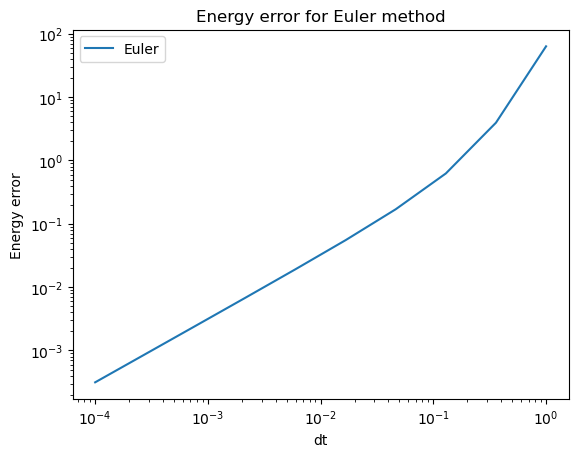

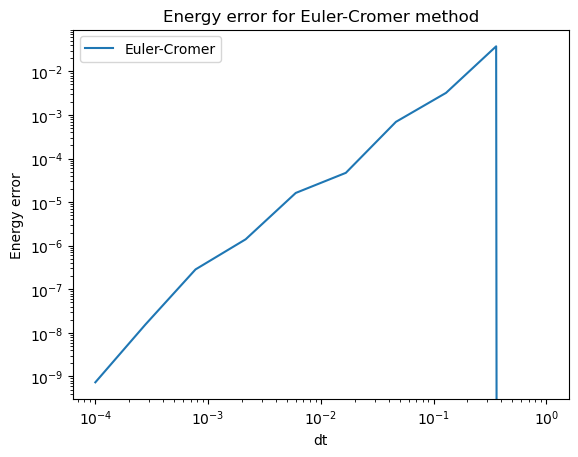

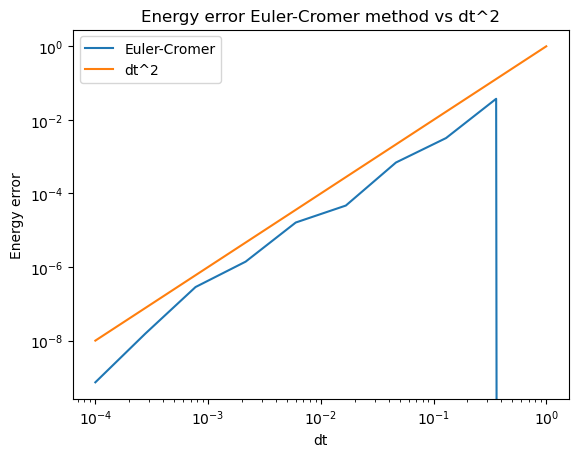

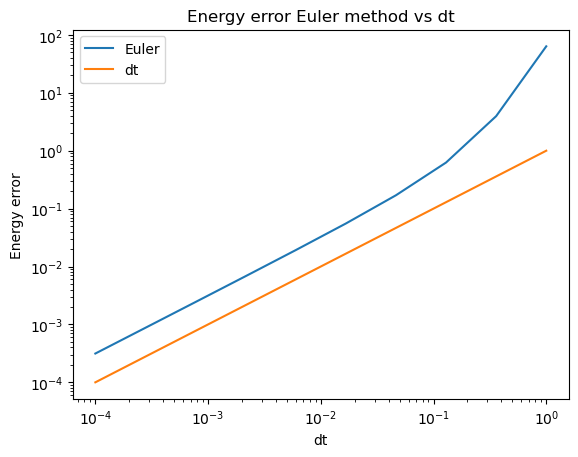

In [6]:
T = 2 * np.pi
dt_values = np.logspace(-4, 0, 10)  # range of time step sizes

energy_error_euler = []
energy_error_euler_cromer = []
for dt in dt_values:
    x, v = x0, v0
    t = 0
    while t < T:
        x, v = euler(x, v, dt)
        t += dt
    energy_error_euler.append(np.abs(energy_euler(x, v) - E_true))
    x, v = x0, v0
    t = 0
    while t < T:
        x, v = euler_cromer(x, v, dt)
        t += dt
    energy_error_euler_cromer.append(np.abs(energy_euler_cromer(x, v) - E_true))

# plot energy error for euler
plt.figure()
plt.loglog(dt_values, energy_error_euler, label='Euler')
plt.xlabel('dt')
plt.ylabel('Energy error')
plt.title('Energy error for Euler method')
plt.legend()
plt.show()

# plot energy error for euler-cromer
plt.figure()
plt.loglog(dt_values, energy_error_euler_cromer, label='Euler-Cromer')
plt.xlabel('dt')
plt.ylabel('Energy error')
plt.title('Energy error for Euler-Cromer method')
plt.legend()
plt.show()

# show that the energy error for the Euler-Cromer method is proportional to dt^2
plt.figure()
plt.loglog(dt_values, energy_error_euler_cromer, label='Euler-Cromer')
plt.loglog(dt_values, dt_values**2, label='dt^2')
plt.xlabel('dt')
plt.ylabel('Energy error')
plt.title('Energy error Euler-Cromer method vs dt^2')
plt.legend()
plt.show()

# show that the energy error for the Euler method is proportional to dt
plt.figure()
plt.loglog(dt_values, energy_error_euler, label='Euler')
plt.loglog(dt_values, dt_values, label='dt')
plt.xlabel('dt')
plt.ylabel('Energy error')
plt.title('Energy error Euler method vs dt')
plt.legend()
plt.show()

#### Problem 3: The coffee cup (Gould 3.14)

The nature of the energy transfer from the hot water in a cup of coffee to the surrounding air is complicated and, in general, involves the mechanisms of convection, radiation, evaporation, and conduction. However, if the temperature difference between the water and its surroundings is not too large, the rate of change of the temperature of the water may be assumed to be proportional to the temperature difference. We can formulate this statement more precisely in terms of a differential equation:
$$
\begin{equation}
\frac{dT}{dt} = -r(T-T_{s})
\end{equation}
$$
where $T$ is the temperature of the water, $T_{s}$ is the temperature of its surroundings, and $r$ is the cooling constant. The minus sign in (3.21) implies that if $T$ > $T_{s}$, the temperature of the water will decrease with time. The value of the cooling constant r depends on the heat transfer mechanism, the contact area with the surroundings, and the thermal properties of the water. The relation is sometimes known as Newton’s law of cooling, even though the relation is only approximate, and Newton did not express the rate of cooling in this form.

1. Write a program that computes the numerical solution. Test your program by choosing the initial temperature $T_{0} = 100C, T_{s} = 0C$, and $r = 1$.

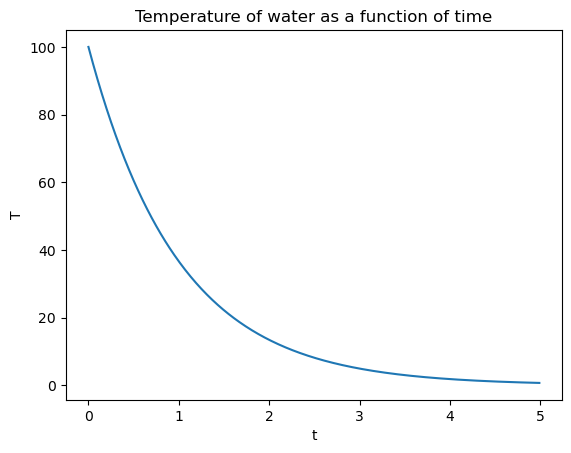

In [31]:
class CoffeeCooling:
    def __init__(self, T0, Ts, r, dt, t_values=[]):
        self.T0 = T0
        self.Ts = Ts
        self.r = r
        self.dt = dt
        self.t_values = t_values
        self.T_values = []

    def euler(self):
        T = self.T0
        for t in self.t_values:
            self.T_values.append(T)
            T += -self.r * (T - self.Ts) * self.dt

    def plot(self, title='Temperature of water as a function of time'):
        plt.figure()
        plt.plot(self.t_values, self.T_values)
        plt.xlabel('t')
        plt.ylabel('T')
        plt.title(title)
        plt.show()

# use the class
cc = CoffeeCooling(100, 0, 1, 0.01, np.arange(0, 5, 0.01))
cc.euler()
cc.plot()

2. Model the cooling of a cup of coffee by choosing $r = 0.03$. What are the units of r? Plot the temperature $T$ as a function of the time using $T_{0} = 87C$ and $T_{s} = 17C$. Make sure that your value of $\Delta t$ is sufficiently small so that it does not affect your results. What is the appropriate unit of time in this case?

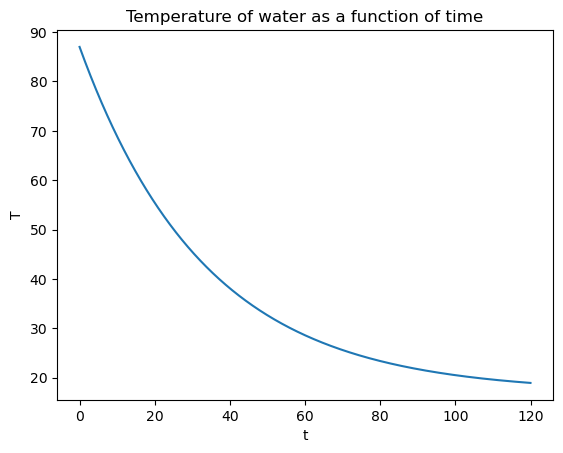

In [29]:
# initial conditions
T0 = 87
Ts = 17
r = 0.03
dt = 0.01
t_values = np.arange(0, 120, dt)
T_values = []

cc = CoffeeCooling(T0, Ts, r, dt, t_values)
cc.euler()
cc.plot()

The units of r are 1/time.

The appropriate unit of time in this case appears to be minutes.

3. Suppose that the initial temperature of a cup of coffee is 87C, but the coffee can be sipped comfortably only when its temperature is ≤ 75C. Assume that the addition of cream cools the coffee by 5C. If you are in a hurry and want to wait the shortest possible time, should the cream be added first and the coffee be allowed to cool, or should you wait until the coffee has cooled to 80C before adding the cream? Use your program to simulate these two cases.

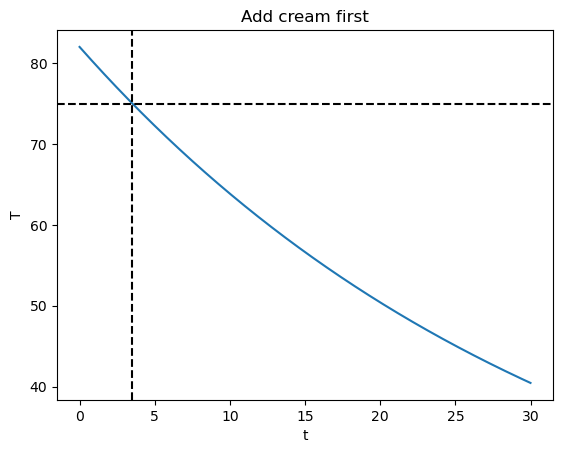

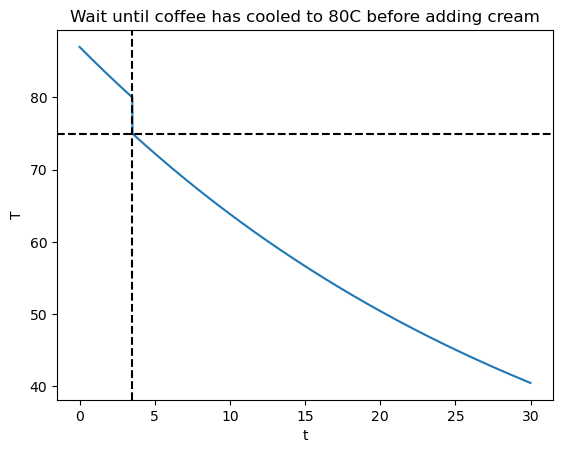

In [49]:
# add cream first
T0 = 87
Ts = 17
r = 0.03
dt = 0.01
t_values = np.arange(0, 30, dt)
T_values = []

cc = CoffeeCooling(T0, Ts, r, dt, t_values)
cc.euler()
T_values = np.array(cc.T_values)
T_values -= 5
cc.T_values = T_values.tolist()
# plot results including a line at 75C that shows the time at which the coffee can be sipped
fig = plt.figure()
plt.plot(t_values, T_values)
plt.axhline(75, color='k', linestyle='--')
# line where T(t) = 75
t_sip = t_values[np.where(T_values < 75)[0][0]]
plt.axvline(t_sip, color='k', linestyle='--')
plt.xlabel('t')
plt.ylabel('T')
plt.title('Add cream first')
plt.show()

# wait until coffee has cooled to 80C before adding cream
T0 = 87
Ts = 17
r = 0.03
dt = 0.01
t_values = np.arange(0, 30, dt)
T_values = []

cc = CoffeeCooling(T0, Ts, r, dt, t_values)
cc.euler()
T_values = np.array(cc.T_values)
T_values[T_values < 80] -= 5
cc.T_values = T_values.tolist()
fig = plt.figure()
plt.plot(t_values, cc.T_values)
plt.axhline(75, color='k', linestyle='--')
# line where T(t) = 75
t_sip = t_values[np.where(T_values < 75)[0][0]]
plt.axvline(t_sip, color='k', linestyle='--')
plt.xlabel('t')
plt.ylabel('T')
plt.title('Wait until coffee has cooled to 80C before adding cream')
plt.show()

It seems that there is no difference in the time it takes for the coffee to cool to 75C, regardless of whether the cream is added first or second.